# Experiments

### Algorithms 

Algorithms differ in how they define biclusters. Some of the common types include:
- constant values, constant rows, or constant columns
- unusually high or low values
- submatrices with low variance
- correlated rows or columns

Algorithms also differ in how rows and columns may be assigned to biclusters, which leads to different bicluster structures. Block diagonal or checkerboard structures occur when rows and columns are divided into partitions.

If each row and each column belongs to exactly one bicluster, then rearranging the rows and columns of the data matrix reveals the biclusters on the diagonal. 

In the checkerboard case, each row belongs to all column clusters, and each column belongs to all row clusters.

### Bicluster Taxonomy

Several types of biclusters have been described and categorised in the literature, depending on
the pattern exhibited by the genes across the experimental conditions.
* **Constant values**: A bicluster with constant values reveals subsets of genes with similar ex-
pression values within a subset of conditions. 
* **Constant values on rows or columns**: A bicluster with constant values in the rows/columns identifies a subset of genes/conditions with similar expression levels across a subset
of conditions/genes. Expression levels might therefore vary from gene to gene or from condition to condition. 
* **Coherent values on both rows and columns**: This kind of bicluster identifies more complex relationships between genes and conditions, either in an additive or multiplicative way-
* **Coherent evolutions**: Evidence that a subset of genes is up-regulated or down-regulated
across a subset of conditions without taking into account their actual expression values. In
this situation, data in the bicluster do not follow any mathematical model.

### Shifting and Scaling Expression Patterns

Possible patterns in gene expression data (does not necessarily apply to Bonferroni corrected p-values). Shifting and scaling patterns are defined using numerical relationships between the values in a bicluster. 
* **Perfect shifting pattern**: The bicluster values can be obtained by adding a constant condition number to a typical value for each gene.
* **Perfect scaling patterns**: The biclsuter values can be obtained by multiplying a typical value for the gene by a scaling coefficient. In this case, the genes do not follow a paral-
lel tendency. Although the genes present the same behaviour with regard to the regulation,
changes are more abrupt for some genes than for others.
* **Perfect shifting and scaling patterns**: A bicluster includes a shifting, a scaling or both shifting and scaling patterns.

### Scoring metrics

There are two ways of evaluating a biclustering result: internal and external. Internal measures, such as cluster stability, rely only on the data and the result themselves. 

* **Silhouette score**: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

External measures refer to an external source of information, such as the true solution. When working with real data the true solution is usually unknown, but biclustering artificial data may be useful for evaluating algorithms precisely because the true solution is known.

To compare a set of found biclusters to the set of true biclusters, two similarity measures are needed: a similarity measure for individual biclusters, and a way to combine these individual similarities into an overall score.

* **Jaccard index**: The Jaccard index achieves its minimum of 0 when the biclusters to not overlap at all and its maximum of 1 when they are identical.

In [1]:
import cluster
import datasets
import model_selection

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralCoclustering

plt.rcParams['font.size'] = 16
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [2]:
# NOTE: Global variables
SEED = 0

## Test data gallery

Load characteristics of reference data 

In [3]:
data_feats = pd.read_csv(
    './../data/data_characteristics.csv', sep='\t', index_col=0
)
data_feats

max           min       std  nrows  ncols  nonzeros
orig_prep_pvalues  73.435290  7.079401e-09  5.889983  27561   2664  73422504
sel_prep_pvalues   73.435290  0.000000e+00  2.897937  27561   2664    739608
orig_prep_pcc       0.852443 -8.669647e-01  0.323260  27561   2664  73422504
sel_prep_pcc        0.852443 -8.669647e-01  0.063930  27561   2664    739608

Generate samples of test data displaying the characteristics of each class of reference data

In [5]:
# NOTE: Every other dataset is sparse and the oposite sets contains negative values
test_data, rows, cols = datasets.gen_test_sets(
    data_feats, sparse=[False, True, False, True], 
    non_neg=[False, True, False, True],
    shape=(500, 300), n_clusters=5, seed=SEED
)

Visualize the test data

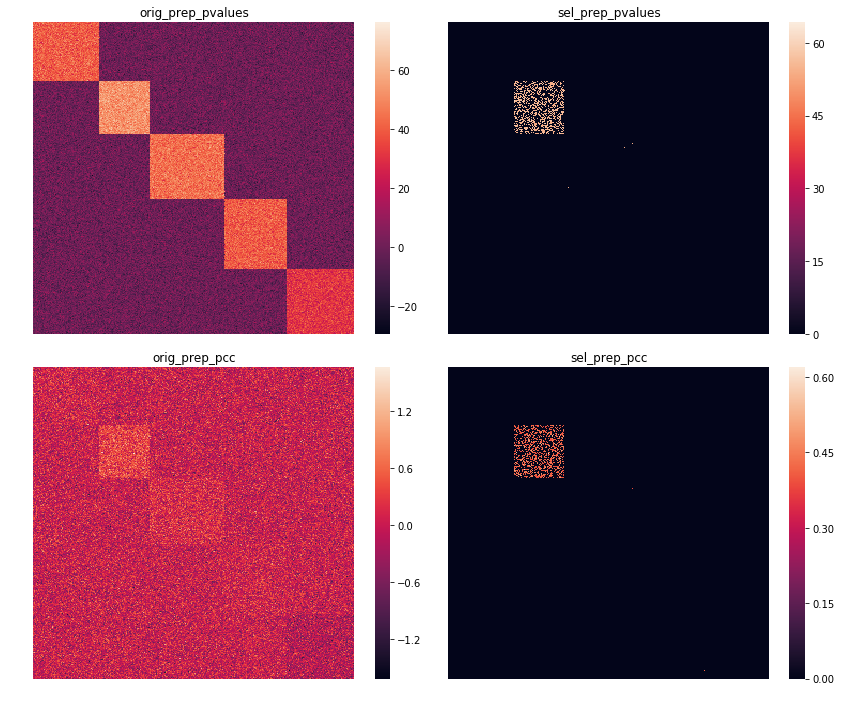

In [16]:
ncols, nrows = 2, 2
labels = list(test_data.keys())

fig, axes = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(12, 10), sharey=True, sharex=True
)
num = 0
for row in range(nrows):
    for col in range(ncols):

        _data = test_data[labels[num]]
        sns.heatmap(
            _data, ax=axes[row, col], cbar=True,
            vmin=np.min(_data), vmax=np.max(_data)
        )
        axes[row, col].set_title(labels[num])
        axes[row, col].axis('off')
        
        num += 1
        
plt.tight_layout()

## Stage 1

NOTES:
* Enable row and column labels properties, and a score method in all algorithms.
* Generate synthetic test data.
* Do grid search with syntetic data to determine optimal hyperparameter settings
    * Use a wrapper with the necessary methods if fit_transform is insufficient (although it seems from sklearn grid search fork that a transform method is sufficient for an estimator meaning that a predict method is not necessarily required)
    * Create a [custom CV](https://stackoverflow.com/questions/34611038/grid-search-for-hyperparameter-evaluation-of-clustering-in-scikit-learn) system that checks the model performance for each hyperparameter setting against each set of synthetic test data.
    
### Experiment: scikit-learn spectral

Setup algorithms and hyperparameter grids

In [ ]:
# NOTE: Grid Search
# * Do not want to optimize with respect to the number of clusters. Pass
#   the correct number of clusters to allow optimization of other params.
# * Passing data to execute() and not constructor allows running
#   experiments with same models and params over different datasets.
models_and_params = [
    (
        SpectralBiclustering, {
            'n_clusters': [5], 'method': ['log', 'bistochastic'], 
            'n_components': [6, 9, 12], 'n_best': [3, 6, 9]
        }
    ),
    (
        SpectralCoclustering, {'n_clusters': [5]}
    )
]

Generate sets of test data

In [ ]:
# NOTE: Test data
# * Generate two sets of data: one with different number of clusters and one
#   with two clusters (ref paper results) and varying array sizes.
# * Goal: Determine which algorithm is best applicable to determine clusters and which is
#   best to handle large arrays.

# NOTE: The reference data contains approx. ten times more rows than columns.
array_size = (1000, 100)
num_clusters = [2, 4, 8, 12]
datasets = [
    
]

Run experiment for each set with four classes of test data

In [ ]:
# NOTE: Experiment
# * One execution = one run for each class of test data with given models
#   and params.
# * Run two experiments per dataset. The second run (validatoin run) indicates whether 
#   the intial results are randomly caused or consistent with the system characteristics.
# * Record the winning model for each class of test data. The model with
#   the most wins per test data class is the recommended model for clustering
#   that type of data.

results = {'run1': None, 'run1': None}
experiment = model_selection.Experiment(models_and_params, verbose=True)

for test_data, test_rows, test_cols in :
    print(test_data.shape)
    #experiment.execute(test_data, (test_rows, test_cols))

### Experiment: R biclust

### Experiment: Binary

## Stage 2

In [ ]:
#orig_pvalues = pd.read_csv('./../data/train/orig_pvalues_prep.csv', sep=',', index_col=0)
#orig_ccp = pd.read_csv('./../data/train/orig_pcc_prep.csv', sep=',', index_col=0)

In [ ]:
# * Necessary to standardize data in order to avoid sklearn inf/NaN error.
#   Also necessary to standardize when clustering reference data?